In [263]:
import pandas as pd

In [264]:
#"C:\Users\User\Desktop\IronHack\Week_2\Day1/GSAF5.xls")
shark_df = pd.read_excel('GSAF5.xls')
shark_df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2025-06-17 00:00:00,2025.0,Unprovoked,USA,South Carolina,Hilton Head Island,Swimming,Not stated,F,12,...,Not stated,Kevin McMurray Trackingsharks.com:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-06-11 00:00:00,2025.0,Unprovoked,USA,Florida,Boca Grande,Snorkeling,Leah Lendel,F,9,...,Bull shark,Kevin McMurray Trackingsharks.com: James Kings...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-05-29 00:00:00,2025.0,Unprovoked,USA,North Carolina,Sunset Beach,Swimming,Sean Barton,M,26,...,Not stated,Kevin McMurray Trackingsharks.com: Clay Crewel...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-05-26 00:00:00,2025.0,Unprovoked,Vanuatu,South Santo,Espiitu Santo Island,Swimming,Tumas,M,14,...,Not stated,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-05-15 00:00:00,2025.0,Unprovoked,Australia,South Australia,Port Noarlunga,Swimming,Richard Vinall,M,66,...,Not stated,Simon DeMarchi: Todd Smith: 9 News:ABC News,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [339]:
def rename_col(df):
    df.columns = [col.replace(" ", "").lower() for col in df.columns]
    return df

In [340]:
shark_df = shark_df.rename(columns={ col: col.replace(" ","").lower() for col in shark_df.columns })

In [341]:
shark_df.head(5)

,date,year,type,country,state,location,activity,name,sex,age,...,species,source,pdf,hrefformula,href,casenumber,casenumber.1,originalorder,unnamed:21,unnamed:22
0,2025-06-17 00:00:00,2025.0,Unprovoked,USA,South Carolina,Hilton Head Island,Swimming,Not stated,F,12,...,Not stated,Kevin McMurray Trackingsharks.com:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-06-11 00:00:00,2025.0,Unprovoked,USA,Florida,Boca Grande,Snorkeling,Leah Lendel,F,9,...,Bull shark,Kevin McMurray Trackingsharks.com: James Kings...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-05-29 00:00:00,2025.0,Unprovoked,USA,North Carolina,Sunset Beach,Swimming,Sean Barton,M,26,...,Not stated,Kevin McMurray Trackingsharks.com: Clay Crewel...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-05-26 00:00:00,2025.0,Unprovoked,Vanuatu,South Santo,Espiitu Santo Island,Swimming,Tumas,M,14,...,Not stated,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-05-15 00:00:00,2025.0,Unprovoked,Australia,South Australia,Port Noarlunga,Swimming,Richard Vinall,M,66,...,Not stated,Simon DeMarchi: Todd Smith: 9 News:ABC News,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [342]:
shark_df_2 = shark_df[[ "date", "year","country", "state", "location", "activity", "injury","age","species"]]
# Species appers as not an index. 

In [351]:
shark_df_2.head()

,date,year,country,state,location,activity,injury,age,species
0,2025-06-17 00:00:00,2025.0,usa,South Carolina,Hilton Head Island,Swimming,Laceration to lower right leg,12,Not stated
1,2025-06-11 00:00:00,2025.0,usa,Florida,Boca Grande,Snorkeling,Right hand almost torn off,9,Bull shark
2,2025-05-29 00:00:00,2025.0,usa,North Carolina,Sunset Beach,Swimming,Gash to lower left leg,26,Not stated
3,2025-05-26 00:00:00,2025.0,vanuatu,South Santo,Espiitu Santo Island,Swimming,Multiple injuries to body one hand and leg bit...,14,Not stated
4,2025-05-15 00:00:00,2025.0,australia,South Australia,Port Noarlunga,Swimming,Injury to thigh,66,Not stated


In [270]:
shark_df_2.shape

(7020, 9)

In [271]:
shark_df_2.duplicated().sum()

10

In [272]:
# Clean & format everything but dates.
# Apply at least five data cleaning techniques, such as handling null values, dropping columns, 
# removing duplicated data, manipulating strings, formatting the data, etc., to prepare the dataset for analysis.

In [273]:
# To check for null values
shark_df_2.isna().any()

date        False
year         True
country      True
state        True
location     True
activity     True
injury       True
age          True
species      True
dtype: bool

In [274]:
shark_df_2.dtypes

date         object
year        float64
country      object
state        object
location     object
activity     object
injury       object
age          object
species      object
dtype: object

In [275]:
# Count the number of null values in each column
shark_df_2.isna().sum()

date           0
year           2
country       50
state        485
location     566
activity     585
injury        35
age         2994
species     3131
dtype: int64

In [276]:
shark_df_2[shark_df_2["country"].isna()].head()
# This missiang values we can drop (delete)

,date,year,country,state,location,activity,injury,age,species
746,Reported 13-Nov-2017,2017.0,NaN,NaN,NaN,Surfing,Puncture wounds to feet,24,NaN
1215,Aug-2014,2014.0,NaN,NaN,NaN,Sea disaster,Shark involvement prior to death not confirmed,NaN,Shark involvement not confirmed
3651,Ca. 1983,1983.0,NaN,English Channel,NaN,Swimming,Left leg bitten,NaN,NaN
4081,Nov-1970,1970.0,NaN,NaN,NaN,NaN,Extensive injuries,NaN,NaN
4090,02-Aug-1970,1970.0,NaN,Caribbean Sea,Between St. Kitts & Nevis,Sea Disaster Sinking of ferryboat Christina,"Sharks scavenged on bodies, but no record of t...",NaN,Shark involvement prior to death was not confi...


In [277]:
shark_df_2[shark_df_2["injury"].isna()].head()
# This we can attribute NaN as a generic injury. If have an attack probably have an injury. 

,date,year,country,state,location,activity,injury,age,species
174,16-Mar-2023,2023.0,AUSTRALIA,Western Australia,Cheynes Beach,Surf-sking,NaN,NaN,5m to 6m shark
247,21-Jun-2022,2022.0,USA,South Carolina,"Myrtle Beach, Horry County",NaN,NaN,teen,NaN
268,15-Mar-2022,2022.0,AUSTRALIA,New South Wales,Crowdy Baay,Swimming,NaN,NaN,NaN
371,26-Mar-2021,2021.0,FRENCH POLYNESIA,Marquesas,Ua Pou,Swimming,NaN,10,NaN
460,20-Jun-2020,2020.0,BAHAMAS,Exumas,"Pig Beach, Pig Island",NaN,NaN,NaN,NaN


In [278]:
shark_df_2[shark_df_2["age"].isna()]
# We can try to use mean to replace the values

,date,year,country,state,location,activity,injury,age,species
72,04 Mar 2024,2024.0,USA,Hawaii,"Old Man's, Waikiki",Surfing,"No injury, shark bit surfboard",NaN,Tiger shark 8'
76,04-Feb-2024,2024.0,TRINIDAD,NaN,NaN,Spearfishing,Shoulder bitten,NaN,Blacktip reef shark
96,03 Nov-2023,2023.0,AUSTRALIA,Westerm Australia,Peak Island,Spearfishing,Minor injury,NaN,Lemon shark
97,02 Nov-2023,2023.0,NEW ZEALAND,North Island,Cape Pallister,Free diving,Minor injury. Wetsuit shredded,NaN,White shark
102,21 Oct-2023,2023.0,AUSTRALIA,Western Australia,"Alexander Bay, Esperance",Fishing,Dinghy damaged by shark. No injurty to the 5 ...,NaN,"Bronze whaler, 6'"
...,...,...,...,...,...,...,...,...,...
7014,Before 1906,0.0,AUSTRALIA,New South Wales,,Swimming,FATAL,NaN,Said to involve a grey nurse shark that leapt ...
7015,Before 1903,0.0,AUSTRALIA,Western Australia,Roebuck Bay,Diving,FATAL,NaN,NaN
7016,Before 1903,0.0,AUSTRALIA,Western Australia,NaN,Pearl diving,FATAL,NaN,NaN
7017,1900-1905,0.0,USA,North Carolina,Ocracoke Inlet,Swimming,FATAL,NaN,NaN


In [279]:
shark_df_2[shark_df_2["year"].isna()]
# Take the yers inside Data and put in column year

,date,year,country,state,location,activity,injury,age,species
875,Reported 08-Jan-2017,NaN,AUSTRALIA,Queensland,NaN,Spearfishing,"No attack, shark made a threat display",35,Bull shark
6789,Reported 19-Aug-1836,NaN,ENGLAND,Cumberland,Whitehaven,Swimming,FATAL,NaN,NaN


In [280]:
shark_df_2[shark_df_2["activity"].isna()]
# We can replace missing values as No Informed

,date,year,country,state,location,activity,injury,age,species
120,21 Aug-2023,2023.0,BAHAMAS,New Providence Isoad,"Saunders Beach, Nassau",NaN,Body found with shark bites. Possible drowning...,20/30,NaN
181,18-Feb-2023,2023.0,ARGENTINA,Patagonia,Chubut Province,NaN,Death by misadventure,32,NaN
225,19-Jul-2022,2022.0,USA,Florida,"Cape Canaveral, Brevard County",NaN,minor injuries,NaN,Shark involvement not confirmed
228,16-Jul-2022,2022.0,USA,Florida,"Daytona Beach Shores, Volusia County",NaN,Minor lacerations to left calf,40,"""A small shark"""
229,13-Jul-2022,2022.0,USA,New York,"Seaview Beach, Suffolk County",NaN,Left wrist and buttocks bitten,49,NaN
...,...,...,...,...,...,...,...,...,...
6987,1940-1946,0.0,PACIFIC OCEAN,NaN,NaN,NaN,FATAL,NaN,NaN
6995,Before 1927,0.0,AUSTRALIA,New South Wales,"Spectacle Island, Port Jackson",NaN,NaN,NaN,NaN
7000,1920 -1923,0.0,AUSTRALIA,Queensland,Great Barrier Reef,NaN,FATAL,NaN,NaN
7010,Circa 1862,0.0,USA,Hawaii,Puna,NaN,Ankle bitten,NaN,NaN


In [281]:
# NA values for location
shark_df_2[shark_df_2["location"].isna()].head()

,date,year,country,state,location,activity,injury,age,species
76,04-Feb-2024,2024.0,TRINIDAD,NaN,NaN,Spearfishing,Shoulder bitten,NaN,Blacktip reef shark
114,Reported 06-Sep-2023,2023.0,Coral Sea,NaN,NaN,On a round-the-world expedition,Catamaran severely damaged by sharks. No injur...,NaN,Cookiecutter sharks
177,02-Mar-2023,2023.0,SEYCHELLES,Praslin Island,NaN,Snorkeling,Left foot bitten,6,Lemon shark
189,Jan-2023,2023.0,Maldives,Vaavu Atoll,NaN,Snorkeling at Shark Feeding site,Minor injury to shoulder and back,30,Nurse shark
195,07-Dec-2022,2022.0,USA,Texas,NaN,Surfing,Foot bitten,NaN,Blacktip


In [282]:
shark_df_2[shark_df_2["state"].isna()].head(5)
# We can try to use an IF using the location to complete the State

,date,year,country,state,location,activity,injury,age,species
18,2025-02-10 00:00:00,2025.0,Bahamas,NaN,Bimini Bay,Swimming,Left foot injured,24,bull shark
19,2025-02-10 00:00:00,2025.0,Bahamas,NaN,Bimini Bay,Swimming,Severed archilles tendon artery severed nerves...,20,bull shark
76,04-Feb-2024,2024.0,TRINIDAD,NaN,NaN,Spearfishing,Shoulder bitten,NaN,Blacktip reef shark
114,Reported 06-Sep-2023,2023.0,Coral Sea,NaN,NaN,On a round-the-world expedition,Catamaran severely damaged by sharks. No injur...,NaN,Cookiecutter sharks
201,28-Oct-2022,2022.0,BAHAMAS,NaN,Cat Island,Diving,Torso bitten,NaN,NaN


In [283]:
# Show that is none values NA in country, state and location 
shark_df_2.isna().any()

date        False
year         True
country      True
state        True
location     True
activity     True
injury       True
age          True
species      True
dtype: bool

In [284]:
shark_df_2[shark_df_2["location"].isna()].head(5)
# We can pput something as Not reported, do not miss all information as tha majority of the info have the rest of the info

,date,year,country,state,location,activity,injury,age,species
76,04-Feb-2024,2024.0,TRINIDAD,NaN,NaN,Spearfishing,Shoulder bitten,NaN,Blacktip reef shark
114,Reported 06-Sep-2023,2023.0,Coral Sea,NaN,NaN,On a round-the-world expedition,Catamaran severely damaged by sharks. No injur...,NaN,Cookiecutter sharks
177,02-Mar-2023,2023.0,SEYCHELLES,Praslin Island,NaN,Snorkeling,Left foot bitten,6,Lemon shark
189,Jan-2023,2023.0,Maldives,Vaavu Atoll,NaN,Snorkeling at Shark Feeding site,Minor injury to shoulder and back,30,Nurse shark
195,07-Dec-2022,2022.0,USA,Texas,NaN,Surfing,Foot bitten,NaN,Blacktip


In [285]:
shark_df_2[shark_df_2["state"]=="New South Wales"]["location"].nunique()

369

In [286]:
shark_df_2.dtypes

date         object
year        float64
country      object
state        object
location     object
activity     object
injury       object
age          object
species      object
dtype: object

In [344]:
# to put all countries in lowercaps
def lower_row(df,col):
    df[col] = df[col].str.lower()
    return df

shark_df_2= lower_row(shark_df_2,"country")

C:\Users\User\AppData\Local\Temp\ipykernel_5420\3585386730.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].str.lower()


In [345]:
shark_df_2['country'].value_counts()

country
usa                   2561
australia             1502
south africa           598
new zealand            146
bahamas                139
                      ... 
admiralty islands        1
aruba                    1
red sea                  1
hawaii                   1
ceylon (sri lanka)       1
Name: count, Length: 219, dtype: int64

In [346]:
country_counts = shark_df['country'].value_counts()

# Convert to DataFrame
country_counts_df = shark_df_2['country'].value_counts().reset_index()
country_counts_df.columns = ['country', 'count']
country_counts_df

,country,count
0,usa,2561
1,australia,1502
2,south africa,598
3,new zealand,146
4,bahamas,139
...,...,...
214,admiralty islands,1
215,aruba,1
216,red sea,1
217,hawaii,1


In [353]:
shark_aus_df = shark_df_2[shark_df_2['country']== 'australia']
shark_aus_df

,date,year,country,state,location,activity,injury,age,species
4,2025-05-15 00:00:00,2025.0,australia,South Australia,Port Noarlunga,Swimming,Injury to thigh,66,Not stated
10,2025-03-26 00:00:00,2025.0,australia,WA,Sandtrax Port Beach North Fremantle Perth,Swimming,Bumping to the body,30+,1.5m Tiger shark
11,2025-03-10 00:00:00,2025.0,australia,WA,Duke of Orleans Bay,Surfing,Missing body not recovered,37,Great White Shark
12,2025-03-07 00:00:00,2025.0,australia,NSW,Gunyah beach Bundeena Port Hacking,Swimming,Serious lacerations above right knee.,56,Bull shark
13,2025-02-27 00:00:00,2025.0,australia,Victoria,Nuns Beach near Portland,Swimming,minor lacerations to left calf,40+,Not stated
...,...,...,...,...,...,...,...,...,...
7012,Before 1906,0.0,australia,NaN,NaN,Fishing,FATAL,NaN,Blue pointer
7013,Before 1906,0.0,australia,NaN,NaN,Fishing,FATAL,NaN,Blue pointers
7014,Before 1906,0.0,australia,New South Wales,,Swimming,FATAL,NaN,Said to involve a grey nurse shark that leapt ...
7015,Before 1903,0.0,australia,Western Australia,Roebuck Bay,Diving,FATAL,NaN,NaN


In [350]:
shark_aus_df = shark_df_2[shark_df_2["country"] == "australia"]["state"].value_counts().head(5)

In [354]:
state_counts_df = shark_aus_df['state'].value_counts().reset_index()
state_counts_df.columns = ['state', 'count']
state_counts_df

,state,count
0,New South Wales,522
1,Queensland,352
2,Western Australia,237
3,South Australia,118
4,Victoria,96
5,Torres Strait,70
6,Tasmania,44
7,Northern Territory,23
8,Westerm Australia,5
9,Northern Territory,4


In [290]:
shark_df_2[shark_df_2["country"] == "usa"]["state"].value_counts().head(5)

state
Florida           1187
Hawaii             344
California         324
South Carolina     173
North Carolina     119
Name: count, dtype: int64

In [291]:
# function to drop the NA values in country, now we have 6970 rows
shark_df_2 = shark_df_2.dropna(subset=['country'])

In [292]:
shark_df_2.shape

(6970, 9)

In [293]:
shark_df_2["country"].nunique()

219

In [294]:
shark_df_2["country"].value_counts().head()

country
usa             2561
australia       1502
south africa     598
new zealand      146
bahamas          139
Name: count, dtype: int64

In [295]:
shark_df_2[shark_df_2["country"] == "australia"]

,date,year,country,state,location,activity,injury,age,species
4,2025-05-15 00:00:00,2025.0,australia,South Australia,Port Noarlunga,Swimming,Injury to thigh,66,Not stated
10,2025-03-26 00:00:00,2025.0,australia,WA,Sandtrax Port Beach North Fremantle Perth,Swimming,Bumping to the body,30+,1.5m Tiger shark
11,2025-03-10 00:00:00,2025.0,australia,WA,Duke of Orleans Bay,Surfing,Missing body not recovered,37,Great White Shark
12,2025-03-07 00:00:00,2025.0,australia,NSW,Gunyah beach Bundeena Port Hacking,Swimming,Serious lacerations above right knee.,56,Bull shark
13,2025-02-27 00:00:00,2025.0,australia,Victoria,Nuns Beach near Portland,Swimming,minor lacerations to left calf,40+,Not stated
...,...,...,...,...,...,...,...,...,...
7012,Before 1906,0.0,australia,NaN,NaN,Fishing,FATAL,NaN,Blue pointer
7013,Before 1906,0.0,australia,NaN,NaN,Fishing,FATAL,NaN,Blue pointers
7014,Before 1906,0.0,australia,New South Wales,,Swimming,FATAL,NaN,Said to involve a grey nurse shark that leapt ...
7015,Before 1903,0.0,australia,Western Australia,Roebuck Bay,Diving,FATAL,NaN,NaN


In [296]:
# filter country as australia
shark_df_2[shark_df_2["country"] == "australia"]["state"].unique()

array(['South Australia', 'WA', 'NSW', 'Victoria', 'Western Australia',
       'Queensland', 'New  South Wales', 'New South Wales',
       'Westerm Australia', 'New South ales', 'Western  Australia', nan,
       'Tasmania', 'Northern Territory ', 'New South Wales ',
       'Torres Strait', 'Northern Territory',
       'Territory of Cocos (Keeling) Islands', 'Victoria ',
       'Torres Strait ', 'Queensland ', 'Norfolk Island'], dtype=object)

In [297]:
shark_df_2[shark_df_2["country"] == "australia"]["state"].value_counts().head()

state
New South Wales      522
Queensland           352
Western Australia    237
South Australia      118
Victoria              96
Name: count, dtype: int64

In [298]:
shark_df_2[(shark_df_2["country"] == "australia") & (shark_df_2["state"].isna())].head()
# Inside the filter, country, already with cleaning data, using "australia". Is applied the function for NA in state. Are only 15. 

,date,year,country,state,location,activity,injury,age,species
257,Reported 27-Apr-2022,2022.0,australia,NaN,NaN,Paddleboarding,"No injury, knocked off board by shark chasing ...",32,NaN
2260,Reported 15-Jul-2005,2005.0,australia,NaN,NaN,NaN,"A hoax - No shark was involved and Wells' ""dau...",NaN,No shark involvement
4230,09-May-1967,1967.0,australia,NaN,Aquarium,Feeding a shark,Recorded as PROVOKED INCIDENT,22,Grey nurse shark
4282,20-May-1966,1966.0,australia,NaN,7 miles offshore on east coast of Australia,Shipwreck,"FATAL, other human remains bitten by sharks, 1...",38,Believed white shark and other smaller species...
5094,Feb-1953,1953.0,australia,NaN,NaN,Spearfishing,Foot bitten,NaN,Wobbegong shark


In [299]:
# Reshaping the names of the states:
shark_df_2["state"] = shark_df_2["state"].replace({"WA": "Western Australia"})
shark_df_2["state"] = shark_df_2["state"].replace({"Westerm Australia": "Western Australia"})
shark_df_2["state"] = shark_df_2["state"].replace({"Westerm  Australia": "Western Australia"})
shark_df_2["state"] = shark_df_2["state"].replace({"Western  Australia": "Western Australia"})
shark_df_2["state"] = shark_df_2["state"].replace({"NSW": "New South Wales"})
shark_df_2["state"] = shark_df_2["state"].replace({"New  South Wales": "New South Wales"})
shark_df_2["state"] = shark_df_2["state"].replace({"New South ales": "New South Wales"})
shark_df_2["state"] = shark_df_2["state"].replace({"New South Wales ": "New South Wales"})
shark_df_2["state"] = shark_df_2["state"].replace({"Queensland ": "Queensland"})
shark_df_2["state"] = shark_df_2["state"].replace({"Victoria ": "Victoria"})
shark_df_2["state"] = shark_df_2["state"].replace({"Victoria ": "Victoria"})
shark_df_2["state"] = shark_df_2["state"].replace({"Northern Territory ": "Northern Territory"})
shark_df_2["state"] = shark_df_2["state"].replace({"Torres Strait ": "Torres Strait"})

In [300]:
# Attributing the value Non indicate for the NA in location 
shark_df_2['location'] = shark_df_2['location'].fillna("Non Indicate")

In [301]:
shark_df_2 = shark_df_2[(shark_df_2["country"] == "australia") & (shark_df_2["state"] == 'New South Wales')]
# Apllying the filter in state for only in New SoutH Wales. We have 528 incidentes.

In [302]:
shark_df_2['species'].isna().sum()

207

In [303]:
shark_df_2['species'] = shark_df_2['species'].fillna("Non Indicated")

In [304]:
shark_df_2['species'].isna().sum()

0

In [305]:
# FINAL VERSION 

shark_df_2

,date,year,country,state,location,activity,injury,age,species
12,2025-03-07 00:00:00,2025.0,australia,New South Wales,Gunyah beach Bundeena Port Hacking,Swimming,Serious lacerations above right knee.,56,Bull shark
16,2025-02-22 00:00:00,2025.0,australia,New South Wales,Off Port Stephens near Newcastle,Fishing was pulled of boat by shark,Body not recovered,58,Mako shark
47,2024-07-23 00:00:00,2024.0,australia,New South Wales,"North Shore Beach, Port Macquarie",Surfing,Serious injury to leg,23,3m White Shark
77,29 Jan-2024,2024.0,australia,New South Wales,"Elizabeth Bay, Sydney Harbor",Swimming,Right leg bitten,29,Bull shark
84,25 Dec-2023,2023.0,australia,New South Wales,Old Bar,Surfing,Injury to right thigh,16,Non Indicated
...,...,...,...,...,...,...,...,...,...
6845,1791,1791.0,australia,New South Wales,Port Jackson,NaN,"FATAL, ""bitten in two""",NaN,Non Indicated
6846,10-May-1788,1788.0,australia,New South Wales,Sydney Harbor,Fishing,"No injury to occupants, shark bit oar and rudder",NaN,Non Indicated
6890,Ca. 5 A.D.,5.0,australia,New South Wales,Bondi,NaN,Aboriginal rock carving depicts man being atta...,NaN,Non Indicated
6995,Before 1927,0.0,australia,New South Wales,"Spectacle Island, Port Jackson",NaN,NaN,NaN,Non Indicated


In [306]:
clean_columns_df = shark_df_2

In [307]:
df_clean = clean_columns_df.dropna()
df_clean.to_csv("datos_limpios.csv", index=False)

In [308]:
shark_df_2.shape

(528, 9)

In [311]:
datos_df = pd.read_csv('datos_limpios.csv')
datos_df.shape

(6214, 8)

In [312]:
datos_df.head(5)

,Date,Year,Country,State,Location,Activity,Injury,Age
0,2025-06-17 00:00:00,2025.0,USA,South Carolina,Hilton Head Island,Swimming,laceration to lower right leg,12
1,2025-06-11 00:00:00,2025.0,USA,Florida,Boca Grande,Snorkeling,right hand almost torn off,9
2,2025-05-29 00:00:00,2025.0,USA,North Carolina,Sunset Beach,Swimming,gash to lower left leg,26
3,2025-05-26 00:00:00,2025.0,Vanuatu,South Santo,Espiitu Santo Island,Swimming,multiple injuries to body one hand and leg bit...,14
4,2025-05-15 00:00:00,2025.0,Australia,South Australia,Port Noarlunga,Swimming,injury to thigh,66


In [313]:
datos_df = datos_df.rename(columns={ col: col.replace(" ","").lower() for col in datos_df.columns })

In [314]:
df_merged_2 = pd.merge(shark_df_2,datos_df, on=["date"], how="inner")

In [315]:
df_merged_2

,date,year_x,country_x,state_x,location_x,activity_x,injury_x,age_x,species,year_y,country_y,state_y,location_y,activity_y,injury_y,age_y
0,29 Jan-2024,2024.0,australia,New South Wales,"Elizabeth Bay, Sydney Harbor",Swimming,Right leg bitten,29,Bull shark,2024.0,AUSTRALIA,New South Wales,"Elizabeth Bay, Sydney Harbor",Swimming,right leg bitten,29
1,25 Dec-2023,2023.0,australia,New South Wales,Old Bar,Surfing,Injury to right thigh,16,Non Indicated,2023.0,AUSTRALIA,New South Wales,Old Bar,Surfing,injury to right thigh,16
2,25 Aug 2023,2023.0,australia,New South Wales,"Lighthouse Beach, Port Macquarie",Surfing,Severe injuries to lower limbs,44,"White shark, 3.8-4.2m",2023.0,AUSTRALIA,New South Wales,"Lighthouse Beach, Port Macquarie",Surfing,severe injuries to lower limbs,44
3,11 Dec-2022,2022.0,australia,New South Wales,Killick Creek near Crescent Head,Swimming,Lower leg.h bitten,15,Non Indicated,2022.0,AUSTRALIA,New South ales,Killick Creek near Crescent Head,Swimming,lower leg.h bitten,15
4,31-Aug-2022,2022.0,australia,New South Wales,Avoca,Surfing,Puncture wounds to right hand & forearm,14,Bronze whaler,2022.0,AUSTRALIA,New South Wales,Avoca,Surfing,puncture wounds to right hand & forearm,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,1791,1791.0,australia,New South Wales,Port Jackson,NaN,"FATAL, ""bitten in two""",NaN,Non Indicated,1791.0,AUSTRALIA,New South Wales,Port Jackson,Not Registered,"fatal, ""bitten in two""",28
604,10-May-1788,1788.0,australia,New South Wales,Sydney Harbor,Fishing,"No injury to occupants, shark bit oar and rudder",NaN,Non Indicated,1788.0,AUSTRALIA,New South Wales,Sydney Harbor,Fishing,"no injury to occupants, shark bit oar and rudder",28
605,Ca. 5 A.D.,5.0,australia,New South Wales,Bondi,NaN,Aboriginal rock carving depicts man being atta...,NaN,Non Indicated,5.0,AUSTRALIA,New South Wales,Bondi,Not Registered,aboriginal rock carving depicts man being atta...,28
606,Before 1927,0.0,australia,New South Wales,"Spectacle Island, Port Jackson",NaN,NaN,NaN,Non Indicated,0.0,AUSTRALIA,New South Wales,"Spectacle Island, Port Jackson",Not Registered,secondary injury,28


In [127]:
df_merged_2.isna().sum()

date            0
year_x          0
country_x       0
state_x         0
location_x      0
activity_x     46
injury_x        6
age_x         234
species         0
year_y          0
country_y       0
state_y         0
location_y      0
activity_y      0
injury_y        0
age_y           0
dtype: int64

In [316]:
df_merged_2.drop(columns=["activity_x"], inplace=True)
df_merged_2.drop(columns=["location_y"], inplace=True)
df_merged_2.drop(columns=["state_y"], inplace=True)
df_merged_2.drop(columns=["country_y"], inplace=True)
df_merged_2.drop(columns=["age_x"], inplace=True)
df_merged_2.drop(columns=["injury_x"], inplace=True)
df_merged_2.drop(columns=["year_y"], inplace=True)

In [317]:
df_merged_2.head(5)

,date,year_x,country_x,state_x,location_x,species,activity_y,injury_y,age_y
0,29 Jan-2024,2024.0,australia,New South Wales,"Elizabeth Bay, Sydney Harbor",Bull shark,Swimming,right leg bitten,29
1,25 Dec-2023,2023.0,australia,New South Wales,Old Bar,Non Indicated,Surfing,injury to right thigh,16
2,25 Aug 2023,2023.0,australia,New South Wales,"Lighthouse Beach, Port Macquarie","White shark, 3.8-4.2m",Surfing,severe injuries to lower limbs,44
3,11 Dec-2022,2022.0,australia,New South Wales,Killick Creek near Crescent Head,Non Indicated,Swimming,lower leg.h bitten,15
4,31-Aug-2022,2022.0,australia,New South Wales,Avoca,Bronze whaler,Surfing,puncture wounds to right hand & forearm,14


In [318]:
df_merged_2.isna().sum()

date          0
year_x        0
country_x     0
state_x       0
location_x    0
species       0
activity_y    0
injury_y      0
age_y         0
dtype: int64

In [319]:
df_merged_2.shape

(608, 9)

In [320]:
df_merged_2['country_x'].unique()

array(['australia'], dtype=object)

In [321]:
def rename_col(df):
    df.columns = [col.replace(" ", "").lower() for col in df.columns]
    return df

In [322]:
df_merged_2 = rename_col(df_merged_2)

In [323]:
def shape_col(df):
    new_columns = {}
    for col in df.columns:
        name_b = col.replace('_x', '').replace('_y', '')
        name_cap = name_b.capitalize()
        if name_cap not in new_columns.values():
            new_columns[col] = name_cap
    df = df.rename(columns=new_columns)
    return df

In [324]:
df_merged_2 = shape_col(df_merged_2)

In [325]:
df_merged_2

,Date,Year,Country,State,Location,Species,Activity,Injury,Age
0,29 Jan-2024,2024.0,australia,New South Wales,"Elizabeth Bay, Sydney Harbor",Bull shark,Swimming,right leg bitten,29
1,25 Dec-2023,2023.0,australia,New South Wales,Old Bar,Non Indicated,Surfing,injury to right thigh,16
2,25 Aug 2023,2023.0,australia,New South Wales,"Lighthouse Beach, Port Macquarie","White shark, 3.8-4.2m",Surfing,severe injuries to lower limbs,44
3,11 Dec-2022,2022.0,australia,New South Wales,Killick Creek near Crescent Head,Non Indicated,Swimming,lower leg.h bitten,15
4,31-Aug-2022,2022.0,australia,New South Wales,Avoca,Bronze whaler,Surfing,puncture wounds to right hand & forearm,14
...,...,...,...,...,...,...,...,...,...
603,1791,1791.0,australia,New South Wales,Port Jackson,Non Indicated,Not Registered,"fatal, ""bitten in two""",28
604,10-May-1788,1788.0,australia,New South Wales,Sydney Harbor,Non Indicated,Fishing,"no injury to occupants, shark bit oar and rudder",28
605,Ca. 5 A.D.,5.0,australia,New South Wales,Bondi,Non Indicated,Not Registered,aboriginal rock carving depicts man being atta...,28
606,Before 1927,0.0,australia,New South Wales,"Spectacle Island, Port Jackson",Non Indicated,Not Registered,secondary injury,28


In [331]:
def convert_to_datetime(df, column, format="%d-%b-%Y"):
    df[column] = pd.to_datetime(df[column], format ="%d-%b-%Y", errors="coerce")
    return df
    
df_merged_date = convert_to_datetime(df_merged_2,'Date', format="%d-%b-%Y")
df_merged_date

,Date,Year,Country,State,Location,Species,Activity,Injury,Age
0,NaT,2024.0,australia,New South Wales,"Elizabeth Bay, Sydney Harbor",Bull shark,Swimming,right leg bitten,29
1,NaT,2023.0,australia,New South Wales,Old Bar,Non Indicated,Surfing,injury to right thigh,16
2,NaT,2023.0,australia,New South Wales,"Lighthouse Beach, Port Macquarie","White shark, 3.8-4.2m",Surfing,severe injuries to lower limbs,44
3,NaT,2022.0,australia,New South Wales,Killick Creek near Crescent Head,Non Indicated,Swimming,lower leg.h bitten,15
4,2022-08-31,2022.0,australia,New South Wales,Avoca,Bronze whaler,Surfing,puncture wounds to right hand & forearm,14
...,...,...,...,...,...,...,...,...,...
603,NaT,1791.0,australia,New South Wales,Port Jackson,Non Indicated,Not Registered,"fatal, ""bitten in two""",28
604,1788-05-10,1788.0,australia,New South Wales,Sydney Harbor,Non Indicated,Fishing,"no injury to occupants, shark bit oar and rudder",28
605,NaT,5.0,australia,New South Wales,Bondi,Non Indicated,Not Registered,aboriginal rock carving depicts man being atta...,28
606,NaT,0.0,australia,New South Wales,"Spectacle Island, Port Jackson",Non Indicated,Not Registered,secondary injury,28


In [332]:
df_merged_1950 = df_merged_date[df_merged_date["Date"].dt.year >= 1950]

In [333]:
df_merged_1950.groupby(df_merged_1950["Date"].dt.to_period("M")).size()

Date
1951-01    1
1951-02    2
1951-03    2
1951-12    2
1952-01    1
          ..
2021-09    1
2022-01    2
2022-02    1
2022-03    7
2022-08    2
Freq: M, Length: 205, dtype: int64

In [334]:
df_merged_1950["month"] = df_merged_1950["Date"].dt.month
df_merged_1950.groupby("month").size()
number_incident = df_merged_1950.groupby("month").size().reset_index(name="number_incident")

C:\Users\User\AppData\Local\Temp\ipykernel_5420\154856994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_1950["month"] = df_merged_1950["Date"].dt.month


In [335]:
import re

In [163]:
def lower_loc(location):
    if pd.isna(location):
        return location
    location = location.lower().strip()
    return location.title()

In [154]:
def regex_location(loc):
    
    result = re.search(r"sydney", loc)
    if result:
        print("Sydney")
    
    return loc
    

<Axes: xlabel='month', ylabel='number_incident'>

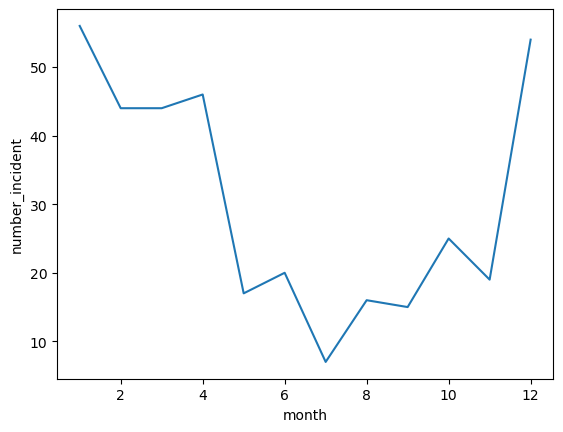

In [336]:
import seaborn as sns
sns.lineplot(data = number_incident, x = "month", y = "number_incident")

In [337]:
df_merged_date

,Date,Year,Country,State,Location,Species,Activity,Injury,Age
0,NaT,2024.0,australia,New South Wales,"Elizabeth Bay, Sydney Harbor",Bull shark,Swimming,right leg bitten,29
1,NaT,2023.0,australia,New South Wales,Old Bar,Non Indicated,Surfing,injury to right thigh,16
2,NaT,2023.0,australia,New South Wales,"Lighthouse Beach, Port Macquarie","White shark, 3.8-4.2m",Surfing,severe injuries to lower limbs,44
3,NaT,2022.0,australia,New South Wales,Killick Creek near Crescent Head,Non Indicated,Swimming,lower leg.h bitten,15
4,2022-08-31,2022.0,australia,New South Wales,Avoca,Bronze whaler,Surfing,puncture wounds to right hand & forearm,14
...,...,...,...,...,...,...,...,...,...
603,NaT,1791.0,australia,New South Wales,Port Jackson,Non Indicated,Not Registered,"fatal, ""bitten in two""",28
604,1788-05-10,1788.0,australia,New South Wales,Sydney Harbor,Non Indicated,Fishing,"no injury to occupants, shark bit oar and rudder",28
605,NaT,5.0,australia,New South Wales,Bondi,Non Indicated,Not Registered,aboriginal rock carving depicts man being atta...,28
606,NaT,0.0,australia,New South Wales,"Spectacle Island, Port Jackson",Non Indicated,Not Registered,secondary injury,28


In [3]:
from IPython.display import IFrame


In [6]:
pdf_url = "Copy of Shark Cage Diving -Group 2.pdf" 
IFrame(pdf_url, width=800, height=600)